FILES NEEDED:

Diabetes_By_State.csv

ProsthOrth_Data.xlsx

Veterans_by_state.xlsx

Smoker_Data

accident2018.csv

accident2019.csv

accident2020.csv

data-table.csv

nst-est2019-01.xlsx


In [7]:
# Import Packages
# Data Handling Tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import altair as alt
from vega_datasets import data
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.colors as mcolors
# !pip install geopandas matplotlib

# Data Analytics Tools
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.metrics import silhouette_score

# Miscellaneous Tools
import chardet
import openpyxl
import kaleido
# !pip install plotly-orca
# !pip install "notebook>=5.3" "ipywidgets>=7.2"
# !pip install kaleido

In [8]:
# initializing and cleaning individual datasets starting with smokers
smoker_data = pd.read_excel('Smoker_Data.xlsx')

#rename column to make it more logical when merged
smoker_data = smoker_data.rename(columns={"Proportion": "Proportion_smokers"})
smoker_data = smoker_data.rename(columns={"Current": "Current_smokers"})

smoker_data.head

#filter rest of columns out
smoker_data = smoker_data.loc[:, ["State", "Proportion_smokers", "Current_smokers"]]

In [9]:
#now with veterans dataset

veterans_data = pd.read_excel('Veterans_by_State.xlsx')

veterans_data = veterans_data.rename(columns={"Grand Total": "number_of_veterans"})

veterans_data = veterans_data.loc[:, ["State", "number_of_veterans"]]

In [10]:
#now with diabetes data set

diabetes_data = pd.read_csv('Diabetes_By_State.csv', skiprows=[0, 1])

diabetes_data = diabetes_data.rename(columns={"Percentage": "Percentage_diabetic"})

diabetes_data = diabetes_data.loc[:, ["State", "Percentage_diabetic"]]

In [11]:
#merging above 3

merged_SmokDiabVet = smoker_data.merge(veterans_data, on='State').merge(diabetes_data, on = 'State')

In [12]:
#condensing accidents data

accident_2018 = pd.read_csv('accident2018.csv')

accident_2018_condensed = accident_2018.groupby('STATENAME').size().reset_index(name='Accidents_2018')
accident_2018_condensed = accident_2018_condensed.rename(columns={"STATENAME": "State"})

In [13]:
accident_2019 = pd.read_csv('accident2019.csv', encoding='ISO-8859-1')

accident_2019_condensed = accident_2019.groupby('STATENAME').size().reset_index(name='Accidents_2019')
accident_2019_condensed = accident_2019_condensed.rename(columns={"STATENAME": "State"})

accident_2019_condensed.head()

/var/folders/wk/mh3nlc5d5mz44xkrmh91ptl00000gn/T/ipykernel_20226/2207328387.py:1: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_2019 = pd.read_csv('accident2019.csv', encoding='ISO-8859-1')


,State,Accidents_2019
0,Alabama,856
1,Alaska,62
2,Arizona,908
3,Arkansas,473
4,California,3427


In [14]:
#condensing accident 2020 data
accident_2020 = pd.read_csv('accident2020.csv', encoding='ISO-8859-1')

accident_2020_condensed = accident_2020.groupby('STATENAME').size().reset_index(name='Accidents_2020')
accident_2020_condensed = accident_2020_condensed.rename(columns={"STATENAME": "State"})

accident_2020_condensed.head()

,State,Accidents_2020
0,Alabama,852
1,Alaska,53
2,Arizona,967
3,Arkansas,585
4,California,3558


In [15]:
#merging accident data sets
merged_accidents = accident_2018_condensed.merge(accident_2019_condensed, on='State').merge(accident_2020_condensed, on = 'State')

merged_accidents.head()

,State,Accidents_2018,Accidents_2019,Accidents_2020
0,Alabama,876,856,852
1,Alaska,69,62,53
2,Arizona,918,908,967
3,Arkansas,476,473,585
4,California,3485,3427,3558


In [16]:
full_dataframe = merged_accidents.merge(merged_SmokDiabVet, on = 'State')

full_dataframe.head()

,State,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic
0,Alabama,876,856,852,0.184967,761140,3.595064e+05,12.9
1,Alaska,69,62,53,0.187964,111288,7.145358e+04,7.4
2,Arizona,918,908,967,0.142557,796004,5.081568e+05,9.7
3,Arkansas,476,473,585,0.196323,491610,2.110032e+05,11.7
4,California,3485,3427,3558,0.106327,3203562,1.642998e+06,9.2


In [17]:
#Data analysis
#this is the raw data size
tuples_list = [accident_2019.shape, accident_2020.shape, accident_2018.shape, smoker_data.shape, veterans_data.shape, diabetes_data.shape]
raw_data_size = tuple(sum(values) for values in zip(*tuples_list))
raw_data_size

(103334, 270)

In [18]:
#save file
file_path = 'Data_Viz_FullData.csv'
full_dataframe.to_csv(file_path, index=False)

In [19]:
#this is the cleaned data size
df = full_dataframe
df.shape

(51, 8)

In [20]:
# column names
df.columns

Index(['State', 'Accidents_2018', 'Accidents_2019', 'Accidents_2020',
       'Proportion_smokers', 'Current_smokers', 'number_of_veterans',
       'Percentage_diabetic'],
      dtype='object')

In [21]:
# classificiation of each column
df.head()

,State,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic
0,Alabama,876,856,852,0.184967,761140,3.595064e+05,12.9
1,Alaska,69,62,53,0.187964,111288,7.145358e+04,7.4
2,Arizona,918,908,967,0.142557,796004,5.081568e+05,9.7
3,Arkansas,476,473,585,0.196323,491610,2.110032e+05,11.7
4,California,3485,3427,3558,0.106327,3203562,1.642998e+06,9.2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Accidents_2018       51 non-null     int64  
 2   Accidents_2019       51 non-null     int64  
 3   Accidents_2020       51 non-null     int64  
 4   Proportion_smokers   51 non-null     float64
 5   Current_smokers      51 non-null     int64  
 6   number_of_veterans   51 non-null     float64
 7   Percentage_diabetic  51 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 3.3+ KB


In [23]:
# fix datatype of percentage_diabetic
df['Percentage_diabetic'] = df['Percentage_diabetic'].astype('float64')
df.dtypes

State                   object
Accidents_2018           int64
Accidents_2019           int64
Accidents_2020           int64
Proportion_smokers     float64
Current_smokers          int64
number_of_veterans     float64
Percentage_diabetic    float64
dtype: object

In [24]:
# quantitative data information
df.describe()

,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000
mean,665.078431,656.607843,701.294118,0.156580,7.705217e+05,3.770146e+05,9.588235
std,742.112224,739.580478,781.515330,0.028843,7.499637e+05,3.689939e+05,1.752900
min,30.000000,22.000000,34.000000,0.084496,7.634400e+04,2.979827e+04,6.700000
25%,208.000000,206.500000,203.500000,0.135808,1.839015e+05,1.267465e+05,8.250000
50%,485.000000,496.000000,540.000000,0.156148,5.871370e+05,2.841411e+05,9.300000
75%,891.500000,867.500000,938.000000,0.173454,9.980935e+05,4.808888e+05,10.800000
max,3485.000000,3427.000000,3558.000000,0.227227,3.203562e+06,1.642998e+06,13.100000


In [25]:
# determine pearson correlation coefficients
df.corr(numeric_only=True)

,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic
Accidents_2018,1.000000,0.999275,0.998531,-0.074976,0.934505,0.965402,0.329473
Accidents_2019,0.999275,1.000000,0.999095,-0.071356,0.932544,0.964993,0.333297
Accidents_2020,0.998531,0.999095,1.000000,-0.061168,0.937068,0.964715,0.339788
Proportion_smokers,-0.074976,-0.071356,-0.061168,1.000000,-0.062484,-0.155825,0.608510
Current_smokers,0.934505,0.932544,0.937068,-0.062484,1.000000,0.970834,0.294272
number_of_veterans,0.965402,0.964993,0.964715,-0.155825,0.970834,1.000000,0.230751
Percentage_diabetic,0.329473,0.333297,0.339788,0.608510,0.294272,0.230751,1.000000


In [26]:
# going to factor for population, then run correlation
pops = pd.read_excel('nst-est2019-01.xlsx', header=0)
population_data2019 = pops
pops.head(10)

,State,Population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223
5,Colorado,5758736
6,Connecticut,3565287
7,Delaware,973764
8,District of Columbia,705749
9,Florida,21477737


In [27]:
# merge df and pops
df_pops = pd.merge(df, pops, on='State')
df_pops.head(10)

,State,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic,Population
0,Alabama,876,856,852,0.184967,761140,3.595064e+05,12.9,4903185
1,Alaska,69,62,53,0.187964,111288,7.145358e+04,7.4,731545
2,Arizona,918,908,967,0.142557,796004,5.081568e+05,9.7,7278717
3,Arkansas,476,473,585,0.196323,491610,2.110032e+05,11.7,3017804
4,California,3485,3427,3558,0.106327,3203562,1.642998e+06,9.2,39512223
5,Colorado,588,545,574,0.134601,587137,3.858066e+05,7.1,5758736
6,Connecticut,275,233,279,0.117712,338849,1.719690e+05,8.2,3565287
7,Delaware,104,122,104,0.153268,124011,7.095816e+04,10.5,973764
8,District of Columbia,30,22,34,0.131734,78869,2.979827e+04,8.3,705749
9,Florida,2917,2952,3098,0.146478,2577420,1.494804e+06,9.5,21477737


In [28]:
# add rows to account for population
df_pops['Accidents_2018_proportion'] = df_pops['Accidents_2018'] / df_pops['Population']
df_pops['Accidents_2019_proportion'] = df_pops['Accidents_2019'] / df_pops['Population']
df_pops['Accidents_2020_proportion'] = df_pops['Accidents_2020'] / df_pops['Population']
df_pops['Current_smokers_proportion'] = df_pops['Current_smokers'] / df_pops['Population']
df_pops['number_of_veterans_proportion'] = df_pops['number_of_veterans'] / df_pops['Population']

In [29]:
df_pops.head()

,State,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic,Population,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion
0,Alabama,876,856,852,0.184967,761140,3.595064e+05,12.9,4903185,0.000179,0.000175,0.000174,0.155234,0.073321
1,Alaska,69,62,53,0.187964,111288,7.145358e+04,7.4,731545,0.000094,0.000085,0.000072,0.152127,0.097675
2,Arizona,918,908,967,0.142557,796004,5.081568e+05,9.7,7278717,0.000126,0.000125,0.000133,0.109360,0.069814
3,Arkansas,476,473,585,0.196323,491610,2.110032e+05,11.7,3017804,0.000158,0.000157,0.000194,0.162903,0.069919
4,California,3485,3427,3558,0.106327,3203562,1.642998e+06,9.2,39512223,0.000088,0.000087,0.000090,0.081078,0.041582


In [30]:
# remove non-proportion columns
df_proportion = df_pops.drop(columns=['Accidents_2018', 'Accidents_2019', 'Accidents_2020', 'Current_smokers', 'number_of_veterans'])

In [31]:
# now run pearson correlation coeff
df.corr(numeric_only=True)

,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic
Accidents_2018,1.000000,0.999275,0.998531,-0.074976,0.934505,0.965402,0.329473
Accidents_2019,0.999275,1.000000,0.999095,-0.071356,0.932544,0.964993,0.333297
Accidents_2020,0.998531,0.999095,1.000000,-0.061168,0.937068,0.964715,0.339788
Proportion_smokers,-0.074976,-0.071356,-0.061168,1.000000,-0.062484,-0.155825,0.608510
Current_smokers,0.934505,0.932544,0.937068,-0.062484,1.000000,0.970834,0.294272
number_of_veterans,0.965402,0.964993,0.964715,-0.155825,0.970834,1.000000,0.230751
Percentage_diabetic,0.329473,0.333297,0.339788,0.608510,0.294272,0.230751,1.000000


In [32]:
# Visuals
full_dataframe = df_pops

full_dataframe.head()

,State,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic,Population,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion
0,Alabama,876,856,852,0.184967,761140,3.595064e+05,12.9,4903185,0.000179,0.000175,0.000174,0.155234,0.073321
1,Alaska,69,62,53,0.187964,111288,7.145358e+04,7.4,731545,0.000094,0.000085,0.000072,0.152127,0.097675
2,Arizona,918,908,967,0.142557,796004,5.081568e+05,9.7,7278717,0.000126,0.000125,0.000133,0.109360,0.069814
3,Arkansas,476,473,585,0.196323,491610,2.110032e+05,11.7,3017804,0.000158,0.000157,0.000194,0.162903,0.069919
4,California,3485,3427,3558,0.106327,3203562,1.642998e+06,9.2,39512223,0.000088,0.000087,0.000090,0.081078,0.041582


In [33]:
#preparing data for analysis
full_dataframe['Proportion_diabetic'] = full_dataframe['Percentage_diabetic'] / 100

full_dataframe.head()

,State,Accidents_2018,Accidents_2019,Accidents_2020,Proportion_smokers,Current_smokers,number_of_veterans,Percentage_diabetic,Population,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,876,856,852,0.184967,761140,3.595064e+05,12.9,4903185,0.000179,0.000175,0.000174,0.155234,0.073321,0.129
1,Alaska,69,62,53,0.187964,111288,7.145358e+04,7.4,731545,0.000094,0.000085,0.000072,0.152127,0.097675,0.074
2,Arizona,918,908,967,0.142557,796004,5.081568e+05,9.7,7278717,0.000126,0.000125,0.000133,0.109360,0.069814,0.097
3,Arkansas,476,473,585,0.196323,491610,2.110032e+05,11.7,3017804,0.000158,0.000157,0.000194,0.162903,0.069919,0.117
4,California,3485,3427,3558,0.106327,3203562,1.642998e+06,9.2,39512223,0.000088,0.000087,0.000090,0.081078,0.041582,0.092


In [34]:
proportion_columns = ['State', 'Accidents_2018_proportion', 'Accidents_2019_proportion', 'Accidents_2020_proportion',
                      'Current_smokers_proportion', 'number_of_veterans_proportion', 'Proportion_diabetic']

df_proportions = full_dataframe[proportion_columns]

# Display the new DataFrame
df_DA = df_proportions

In [35]:
#employing min-max scaling to give all the proportions scores
scaler = MinMaxScaler()

# Select the columns to be scaled excluding 'State'
columns_to_scale = [col for col in df_proportions.columns if col != 'State']

# Apply Min-Max scaling to the selected columns
scaled_data = scaler.fit_transform(df_proportions[columns_to_scale])

# Create a new df with the scaled data and the same column names excluding 'State'
df_scaled_values = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Add the 'State' column back to the new df
df_scaled = pd.concat([df['State'], df_scaled_values], axis=1)

# Display
df_scaled.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,0.863079,0.814042,0.688806,0.651212,0.591514,0.968750
1,Alaska,0.328448,0.304140,0.136355,0.630217,1.000000,0.109375
2,Arizona,0.530033,0.531169,0.465724,0.341175,0.532692,0.468750
3,Arkansas,0.730409,0.712753,0.798325,0.703046,0.534460,0.781250
4,California,0.289650,0.315382,0.232317,0.150024,0.059159,0.390625


In [36]:
df_scaled2 = df_scaled
df_scaled2.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,0.863079,0.814042,0.688806,0.651212,0.591514,0.968750
1,Alaska,0.328448,0.304140,0.136355,0.630217,1.000000,0.109375
2,Arizona,0.530033,0.531169,0.465724,0.341175,0.532692,0.468750
3,Arkansas,0.730409,0.712753,0.798325,0.703046,0.534460,0.781250
4,California,0.289650,0.315382,0.232317,0.150024,0.059159,0.390625


In [37]:
#Here I want to assign weights based on predictive capabilities: according to my research
#Car accidents account for 39% of amputations, Diabetic rates 25%, Smokers 12% and Veterans 7%, other unknown factors are the rest

# Create a list of weights
# one weight for each column in df
weights = [0.13, 0.13, 0.13, 0.12, 0.07, 0.25]

weights_dict = {col: weight for col, weight in zip(df_scaled.columns[1:], weights)}

# Multiply each column except 'State' in the df by its corresponding weight
df_weighted = df_scaled.copy()
for col, weight in weights_dict.items():
    df_weighted[col] = df_scaled[col] * weight

# Display the weighted df
df_weighted.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,0.112200,0.105825,0.089545,0.078145,0.041406,0.242188
1,Alaska,0.042698,0.039538,0.017726,0.075626,0.070000,0.027344
2,Arizona,0.068904,0.069052,0.060544,0.040941,0.037288,0.117187
3,Arkansas,0.094953,0.092658,0.103782,0.084366,0.037412,0.195312
4,California,0.037655,0.041000,0.030201,0.018003,0.004141,0.097656


In [38]:
# create a total risk score for amputations and demand score for prosthetics
# Compute the total score for each row by summing the values across columns excluding the 'State' column
df_weighted['total_score'] = df_weighted.drop('State', axis=1).sum(axis=1)

# Display the updated df with the 'total_score' column
df_weighted.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,total_score
0,Alabama,0.112200,0.105825,0.089545,0.078145,0.041406,0.242188,0.669309
1,Alaska,0.042698,0.039538,0.017726,0.075626,0.070000,0.027344,0.272932
2,Arizona,0.068904,0.069052,0.060544,0.040941,0.037288,0.117187,0.393917
3,Arkansas,0.094953,0.092658,0.103782,0.084366,0.037412,0.195312,0.608483
4,California,0.037655,0.041000,0.030201,0.018003,0.004141,0.097656,0.228656


In [39]:
#Scale the risk score
scaler = MinMaxScaler(feature_range=(0, 10))

# Reshape the 'total_score' column to a 2D array and apply Min-Max scaling
scaled_total_score = scaler.fit_transform(df_weighted[['total_score']])

# Replace the 'total_score' column with the scaled data
df_weighted['total_score'] = scaled_total_score

# Display the updated df with the scaled 'total_score' column
df_weighted.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,total_score
0,Alabama,0.112200,0.105825,0.089545,0.078145,0.041406,0.242188,8.880613
1,Alaska,0.042698,0.039538,0.017726,0.075626,0.070000,0.027344,2.689363
2,Arizona,0.068904,0.069052,0.060544,0.040941,0.037288,0.117187,4.579098
3,Arkansas,0.094953,0.092658,0.103782,0.084366,0.037412,0.195312,7.930537
4,California,0.037655,0.041000,0.030201,0.018003,0.004141,0.097656,1.997779


In [88]:
# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert full state names to abbreviations
df_weighted['State'] = df_weighted['State'].map(state_abbr)

# Create a choropleth map using Plotly Express
fig = px.choropleth(df_weighted,
                    locations='State',
                    locationmode='USA-states',
                    color='total_score',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    labels={'total_score': 'Demand Score'},
                    title='Demand by State')

fig.show()

In [89]:
#Demand Score 2 using cancer instead of diabetes, gonna replace diabetes with cancer
df_scaled2.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,0.863079,0.814042,0.688806,0.651212,0.591514,0.968750
1,Alaska,0.328448,0.304140,0.136355,0.630217,1.000000,0.109375
2,Arizona,0.530033,0.531169,0.465724,0.341175,0.532692,0.468750
3,Arkansas,0.730409,0.712753,0.798325,0.703046,0.534460,0.781250
4,California,0.289650,0.315382,0.232317,0.150024,0.059159,0.390625


In [90]:
#read the cancer rate file and then convert state abbreviations into state names to merge into file

# Function to convert state abbreviation to full name
def convert_state_abbreviation_to_full_name(abbreviation):
    state_dict = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
        'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
        'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
        'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
        'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
        'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
        'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
        'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
        'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
    }

    return state_dict.get(abbreviation, abbreviation)

# Read the CSV file
data = pd.read_csv("data-table.csv")

cancer_data = data

# Convert state abbreviations to full names
data["STATE"] = data["STATE"].apply(convert_state_abbreviation_to_full_name)

data_filtered = data[data["YEAR"] == 2021]

data_filtered = data_filtered.drop(columns=['YEAR'])

data_filtered.head()

,STATE,RATE,DEATHS,URL
0,Alabama,160.2,10429,/nchs/pressroom/states/alabama/al.htm
1,Alaska,156.0,1093,/nchs/pressroom/states/alaska/ak.htm
2,Arizona,134.7,12813,/nchs/pressroom/states/arizona/az.htm
3,Arkansas,168.2,6516,/nchs/pressroom/states/arkansas/ar.htm
4,California,132.4,59503,/nchs/pressroom/states/california/ca.htm


In [91]:
# Rename the 'STATE' column to 'State'
data_filtered = data_filtered.rename(columns={'STATE': 'State'})

# Merge data with df_scaled2 on the 'State' column
cancer_file = pd.merge(data_filtered, df_scaled2, on='State')

# Display the merged data
cancer_file = cancer_file.drop(columns=['URL', 'DEATHS'])
cancer_file.head()

,State,RATE,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,160.2,0.863079,0.814042,0.688806,0.651212,0.591514,0.968750
1,Alaska,156.0,0.328448,0.304140,0.136355,0.630217,1.000000,0.109375
2,Arizona,134.7,0.530033,0.531169,0.465724,0.341175,0.532692,0.468750
3,Arkansas,168.2,0.730409,0.712753,0.798325,0.703046,0.534460,0.781250
4,California,132.4,0.289650,0.315382,0.232317,0.150024,0.059159,0.390625


In [92]:
#going to min max scale again with different proportions,
#this time, car accidents will be 38%, cancer 25%, smoking 11%, veterans 6%, diabetics 2%)

# Initialize the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(0, 10))

# List of columns to scale
columns_to_scale = [
    'RATE', 'Accidents_2018_proportion', 'Accidents_2019_proportion',
    'Accidents_2020_proportion', 'Current_smokers_proportion',
    'number_of_veterans_proportion', 'Proportion_diabetic'
]

# Scale the columns
cancer_file[columns_to_scale] = scaler.fit_transform(cancer_file[columns_to_scale])

# Display the scaled cancer_file
cancer_file.head()

,State,RATE,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,6.153846,8.592696,7.979732,6.888059,6.512118,5.915141,9.68750
1,Alaska,5.494505,3.097643,2.440100,1.363555,6.302167,10.000000,1.09375
2,Arizona,2.150706,5.169578,4.906565,4.657240,3.411746,5.326925,4.68750
3,Arkansas,7.409733,7.229085,6.879313,7.983250,7.030460,5.344605,7.81250
4,California,1.789639,2.698872,2.562237,2.323174,1.500242,0.591588,3.90625


In [93]:
#now weighing each column
# Define the weights
weights = {
    'RATE': 0.25,
    'Accidents_2018_proportion': 0.126,
    'Accidents_2019_proportion': 0.126,
    'Accidents_2020_proportion': 0.126,
    'Current_smokers_proportion': 0.11,
    'number_of_veterans_proportion': 0.06,
    'Proportion_diabetic': 0.02,
}

# Apply the weights to the columns
for column, weight in weights.items():
    cancer_file[column] = cancer_file[column] * weight

In [94]:
#creating score to map and then rescaling the score
cancer_file['total_score_cancer'] = cancer_file.drop(columns=['State']).sum(axis=1)

# Initialize the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(0, 10))

# Apply the scaling to the 'total_score_cancer' column
cancer_file['total_score_cancer'] = scaler.fit_transform(cancer_file[['total_score_cancer']])

In [95]:
# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert full state names to abbreviations
cancer_file['State'] = cancer_file['State'].map(state_abbr)

# Create a choropleth map using Plotly Express
fig = px.choropleth(cancer_file,
                    locations='State',
                    locationmode='USA-states',
                    color='total_score_cancer',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    labels={'total_score_cancer': 'Demand Score'},
                    title='Demand Score by State with Cancer Factor')

fig.show()

In [96]:
# pio.write_html(fig, file='Demand_with_cancer_graph.html', auto_open=False)

In [97]:
df_weighted.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,total_score
0,NaN,0.112200,0.105825,0.089545,0.078145,0.041406,0.242188,8.880613
1,NaN,0.042698,0.039538,0.017726,0.075626,0.070000,0.027344,2.689363
2,NaN,0.068904,0.069052,0.060544,0.040941,0.037288,0.117187,4.579098
3,NaN,0.094953,0.092658,0.103782,0.084366,0.037412,0.195312,7.930537
4,NaN,0.037655,0.041000,0.030201,0.018003,0.004141,0.097656,1.997779


In [98]:
df_pops = df_pops.reset_index()

In [99]:
# get data by year
df_pops.head()
accidents = df_pops[["State", "Accidents_2018_proportion", "Accidents_2019_proportion", "Accidents_2020_proportion"]]
accidents.head()

# Select the columns to be scaled excluding the 'State' column
columns_to_scale = [col for col in accidents.columns if col != 'State']

# Apply Min-Max scaling to the selected columns
scaled_data = scaler.fit_transform(accidents[columns_to_scale])

# Create a new df with the scaled data and the same column names excluding 'State'
df_scaled_values = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Add the 'State' column back to the new DataFrame
df_scaled = pd.concat([df['State'], df_scaled_values], axis=1)

# Display the scaled df
df_scaled.head()

accidents_scaled = df_scaled
accidents_scaled

newcolnames = {'Accidents_2018_proportion': '2018', 'Accidents_2019_proportion': '2019', 'Accidents_2020_proportion': '2020'}
accidents_scaled = accidents_scaled.rename(columns=newcolnames)
accidents_scaled.head()

accidents_scaled["change"] = accidents_scaled["2020"] - accidents_scaled["2018"]
acc = accidents_scaled
acc.head()

,State,2018,2019,2020,change
0,Alabama,8.630789,8.140420,6.888059,-1.742729
1,Alaska,3.284478,3.041397,1.363555,-1.920923
2,Arizona,5.300329,5.311685,4.657240,-0.643089
3,Arkansas,7.304089,7.127526,7.983250,0.679161
4,California,2.896501,3.153820,2.323174,-0.573327


In [100]:
# finding supply side data
# Read the Excel file
file_path = 'ProsthOrth_Data.xlsx'
supply_df = pd.read_excel(file_path, skiprows=5, nrows=48)

supply_df.head()

,Area Name,Employment(1),Employment percent relative standard error(3)
0,Alabama,170,29.1
1,Alaska,-,-
2,Arizona,230,24.7
3,Arkansas,160,38.4
4,California,1060,18.8


In [101]:
# wrangling

supply_df = supply_df.rename(columns={'Area Name': 'State'})

supply_df.head()

,State,Employment(1),Employment percent relative standard error(3)
0,Alabama,170,29.1
1,Alaska,-,-
2,Arizona,230,24.7
3,Arkansas,160,38.4
4,California,1060,18.8


In [102]:
# clean the data of any state values that are blank or list them as 0(?)

# List of states to drop
states_to_drop = ['Alaska', 'Colorado', 'Delaware', 'Vermont', 'Wisconsin', 'District of Columbia']

# Remove rows containing the specified states
cleaned_supply_df = supply_df[~supply_df['State'].isin(states_to_drop)]

# Reset the index after removing the rows
cleaned_supply_df.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
# print(cleaned_supply_df)

# rename columns

# Rename the 'Employment(1)' column
cleaned_supply_df = cleaned_supply_df.rename(columns={'Employment(1)': 'Number of Prosthetists'})

# Display the updated dataframe
cleaned_supply_df.head()

,State,Number of Prosthetists,Employment percent relative standard error(3)
0,Alabama,170,29.1
1,Arizona,230,24.7
2,Arkansas,160,38.4
3,California,1060,18.8
4,Connecticut,70,25.0


In [103]:
# scale these values by population

cleaned_supply_df = cleaned_supply_df.merge(pops, on='State')

In [104]:
cleaned_supply_df.head()

,State,Number of Prosthetists,Employment percent relative standard error(3),Population
0,Alabama,170,29.1,4903185
1,Arizona,230,24.7,7278717
2,Arkansas,160,38.4,3017804
3,California,1060,18.8,39512223
4,Connecticut,70,25.0,3565287


In [105]:
#now add a column to find the prosthetists by capita

cleaned_supply_df['Number of Prosthetists'] = pd.to_numeric(cleaned_supply_df['Number of Prosthetists'], errors='coerce')
cleaned_supply_df['Population'] = pd.to_numeric(cleaned_supply_df['Population'], errors='coerce')

# Calculate the 'prosthetists per capita' column
cleaned_supply_df['prosthetists per capita'] = cleaned_supply_df['Number of Prosthetists'] / cleaned_supply_df['Population']

# Display the updated df
cleaned_supply_df.head()

,State,Number of Prosthetists,Employment percent relative standard error(3),Population,prosthetists per capita
0,Alabama,170,29.1,4903185,0.000035
1,Arizona,230,24.7,7278717,0.000032
2,Arkansas,160,38.4,3017804,0.000053
3,California,1060,18.8,39512223,0.000027
4,Connecticut,70,25.0,3565287,0.000020


In [106]:
#min max scale

scaler = MinMaxScaler(feature_range=(0, 10))

# Scale the 'prosthetists per capita' column using the scaler and create the 'Supply Score' column with the scaled values
cleaned_supply_df['Supply Score'] = scaler.fit_transform(cleaned_supply_df[['prosthetists per capita']])

In [107]:
cleaned_supply_df.head()

,State,Number of Prosthetists,Employment percent relative standard error(3),Population,prosthetists per capita,Supply Score
0,Alabama,170,29.1,4903185,0.000035,4.062962
1,Arizona,230,24.7,7278717,0.000032,3.482162
2,Arkansas,160,38.4,3017804,0.000053,7.531347
3,California,1060,18.8,39512223,0.000027,2.580093
4,Connecticut,70,25.0,3565287,0.000020,1.220256


In [108]:
# Convert full state names to abbreviations
cleaned_supply_df['State'] = cleaned_supply_df['State'].map(state_abbr)

# Create a choropleth map using Plotly Express
fig = px.choropleth(cleaned_supply_df,
                    locations='State',
                    locationmode='USA-states',
                    color='Supply Score',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    labels={'Supply Score': 'Supply Score'},
                    title='Supply Scores by State')

# Show the plot
fig.show()
# 10 = lots of prostethists

In [109]:
#fig.write_html("visual_four.html")
#pio.write_image(fig, "visual_four.png", format='png', engine='kaleido')

In [110]:
cleaned_supply_df.head()

,State,Number of Prosthetists,Employment percent relative standard error(3),Population,prosthetists per capita,Supply Score
0,AL,170,29.1,4903185,0.000035,4.062962
1,AZ,230,24.7,7278717,0.000032,3.482162
2,AR,160,38.4,3017804,0.000053,7.531347
3,CA,1060,18.8,39512223,0.000027,2.580093
4,CT,70,25.0,3565287,0.000020,1.220256


In [111]:
df_weighted.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,total_score
0,NaN,0.112200,0.105825,0.089545,0.078145,0.041406,0.242188,8.880613
1,NaN,0.042698,0.039538,0.017726,0.075626,0.070000,0.027344,2.689363
2,NaN,0.068904,0.069052,0.060544,0.040941,0.037288,0.117187,4.579098
3,NaN,0.094953,0.092658,0.103782,0.084366,0.037412,0.195312,7.930537
4,NaN,0.037655,0.041000,0.030201,0.018003,0.004141,0.097656,1.997779


In [112]:
# create a df that has supply and demand scores so we can compare/contrast them

# Merge the df on the "State" column
SupplyVSDemand_df = pd.merge(df_weighted, cleaned_supply_df, on='State')

# Display the new df
SupplyVSDemand_df.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,total_score,Number of Prosthetists,Employment percent relative standard error(3),Population,prosthetists per capita,Supply Score


In [113]:
#make new column for opportunity zones
SupplyVSDemand_df['Opportunity Score'] = SupplyVSDemand_df['total_score'] - SupplyVSDemand_df['Supply Score']

# Display the updated df
SupplyVSDemand_df.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,total_score,Number of Prosthetists,Employment percent relative standard error(3),Population,prosthetists per capita,Supply Score,Opportunity Score


In [114]:
# Create a choropleth map using Plotly Express
fig = px.choropleth(SupplyVSDemand_df,
                    locations='State',
                    locationmode='USA-states',
                    color='Opportunity Score',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    labels={'Opportunity Score': 'Opportunity Score'},
                    title='Opportunity Scores by State')

# Show the plot
fig.show()

In [115]:
#fig.write_html("visual_six.html")
#pio.write_image(fig, "visual_six.png", format='png', engine='kaleido')

In [116]:
####################################

# Data Analytics Work

###############################


In [117]:
df_DA.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic
0,Alabama,0.000179,0.000175,0.000174,0.155234,0.073321,0.129
1,Alaska,0.000094,0.000085,0.000072,0.152127,0.097675,0.074
2,Arizona,0.000126,0.000125,0.000133,0.109360,0.069814,0.097
3,Arkansas,0.000158,0.000157,0.000194,0.162903,0.069919,0.117
4,California,0.000088,0.000087,0.000090,0.081078,0.041582,0.092


In [118]:
# Filter the cancer_data DataFrame to include only the year 2019
cancer_data_2019 = cancer_data[cancer_data["YEAR"] == 2021]

# Convert the "DEATHS" column in cancer_data_2019 to numeric type
cancer_data_2019["DEATHS"] = pd.to_numeric(cancer_data_2019["DEATHS"], errors="coerce")

# Convert the "Population" column in population_data2019 to numeric type
population_data2019["Population"] = pd.to_numeric(population_data2019["Population"], errors="coerce")

# Calculate the cancer_proportion by dividing DEATHS by population
cancer_data_2019["cancer_proportion"] = cancer_data_2019["DEATHS"] / population_data2019["Population"]

# Create a new DataFrame with only "STATE" and "cancer_proportion" columns
new_cancer_df = cancer_data_2019[["STATE", "cancer_proportion"]].copy()

new_cancer_df.rename(columns={"STATE": "State"}, inplace=True)

/var/folders/wk/mh3nlc5d5mz44xkrmh91ptl00000gn/T/ipykernel_20226/3006927592.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wk/mh3nlc5d5mz44xkrmh91ptl00000gn/T/ipykernel_20226/3006927592.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
# Perform the join operation
Full_DA_df = df_DA.merge(new_cancer_df, on="State")

# Print the resulting DataFrame
Full_DA_df.head(5)

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,cancer_proportion
0,Alabama,0.000179,0.000175,0.000174,0.155234,0.073321,0.129,0.002127
1,Alaska,0.000094,0.000085,0.000072,0.152127,0.097675,0.074,0.001494
2,Arizona,0.000126,0.000125,0.000133,0.109360,0.069814,0.097,0.001760
3,Arkansas,0.000158,0.000157,0.000194,0.162903,0.069919,0.117,0.002159
4,California,0.000088,0.000087,0.000090,0.081078,0.041582,0.092,0.001506


In [120]:
Full_DA_df.head()

,State,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,cancer_proportion
0,Alabama,0.000179,0.000175,0.000174,0.155234,0.073321,0.129,0.002127
1,Alaska,0.000094,0.000085,0.000072,0.152127,0.097675,0.074,0.001494
2,Arizona,0.000126,0.000125,0.000133,0.109360,0.069814,0.097,0.001760
3,Arkansas,0.000158,0.000157,0.000194,0.162903,0.069919,0.117,0.002159
4,California,0.000088,0.000087,0.000090,0.081078,0.041582,0.092,0.001506


In [121]:
Full_DA_df.columns

Index(['State', 'Accidents_2018_proportion', 'Accidents_2019_proportion',
       'Accidents_2020_proportion', 'Current_smokers_proportion',
       'number_of_veterans_proportion', 'Proportion_diabetic',
       'cancer_proportion'],
      dtype='object')

In [122]:
Full_DA_df_clustered = Full_DA_df

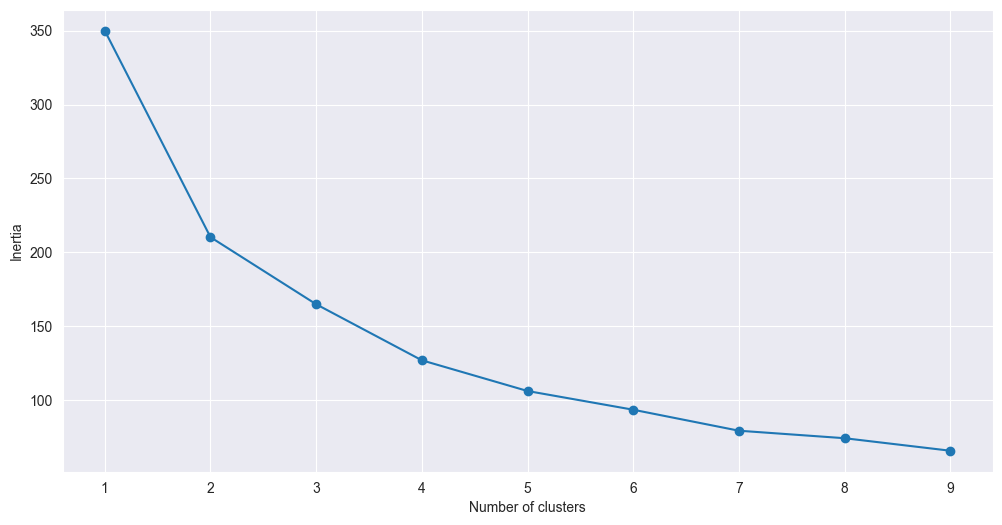

In [123]:
# Assuming your dataframe is called Full_DA_df
# If 'State' column is not numerical, we should drop it for the clustering. We'll reassign it later.
states = Full_DA_df_clustered['State']
df = Full_DA_df_clustered.drop('State', axis=1)

# Preprocessing: Since KMeans relies on Euclidean distance, variables should be scaled
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init=10)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the above plot we take the cluster value where the decrease in inertia begins to slow (elbow method)
# Let's assume it's 3 for this case

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=10)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

# Reassign states to our dataframe and add the predicted clusters
Full_DA_df_clustered = df
Full_DA_df_clustered['State'] = states
Full_DA_df_clustered['cluster'] = pred

In [124]:
Full_DA_df_clustered.head()
# print(Full_DA_df_clustered)

,Accidents_2018_proportion,Accidents_2019_proportion,Accidents_2020_proportion,Current_smokers_proportion,number_of_veterans_proportion,Proportion_diabetic,cancer_proportion,State,cluster
0,0.000179,0.000175,0.000174,0.155234,0.073321,0.129,0.002127,Alabama,0
1,0.000094,0.000085,0.000072,0.152127,0.097675,0.074,0.001494,Alaska,1
2,0.000126,0.000125,0.000133,0.109360,0.069814,0.097,0.001760,Arizona,1
3,0.000158,0.000157,0.000194,0.162903,0.069919,0.117,0.002159,Arkansas,0
4,0.000088,0.000087,0.000090,0.081078,0.041582,0.092,0.001506,California,2


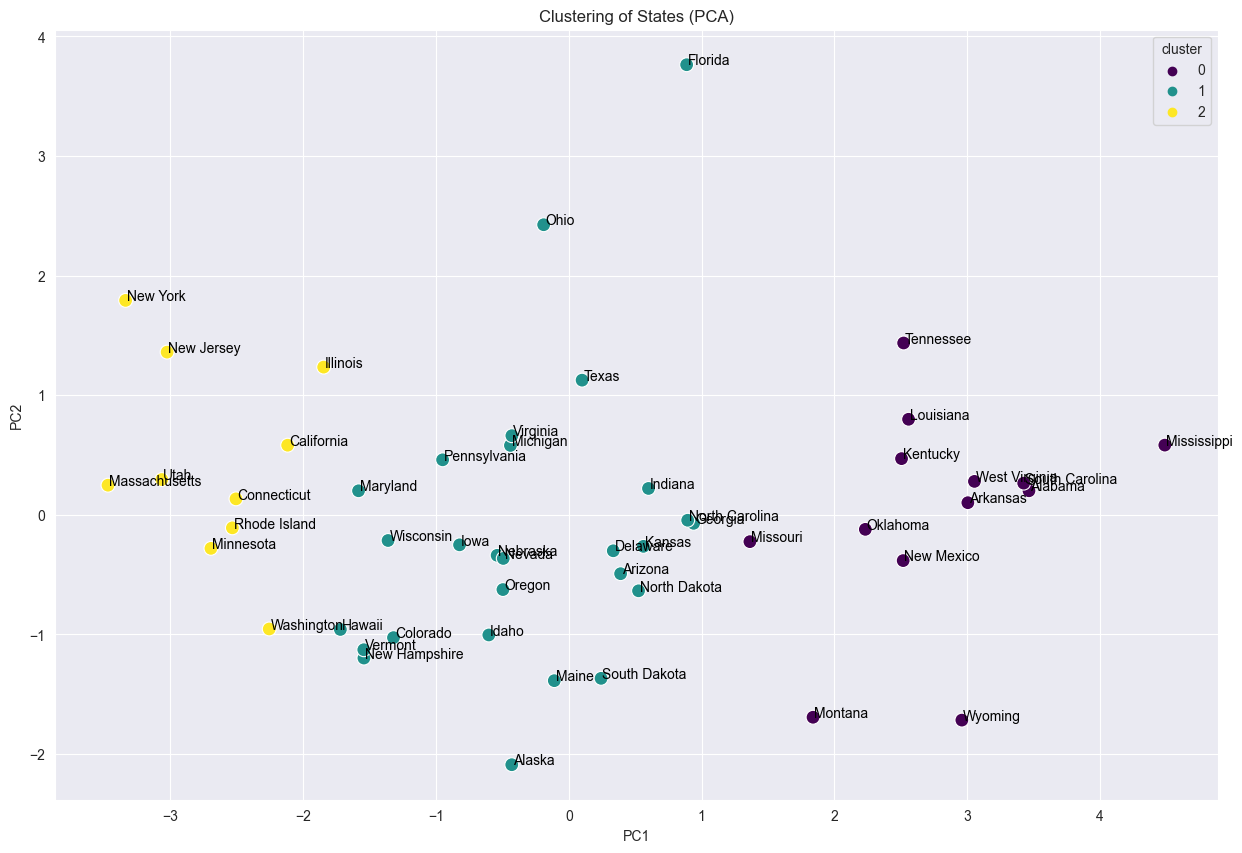

In [125]:
# We already have scaled data and prediction from the previous steps
pca = PCA(n_components=2) # Two components for 2D visualization
principalComponents = pca.fit_transform(data_scaled)

# Adding the principal components into our dataframe
Full_DA_df_clustered['PC1'] = principalComponents[:, 0]
Full_DA_df_clustered['PC2'] = principalComponents[:, 1]

# Create a scatterplot of the PCA results where color is based on cluster
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=Full_DA_df_clustered, palette='viridis', s=100)

# Add state names to the points
for line in range(0, Full_DA_df_clustered.shape[0]):
    plt.text(Full_DA_df_clustered.PC1[line]+0.01, Full_DA_df_clustered.PC2[line],
             Full_DA_df_clustered.State[line], horizontalalignment='left',
             size='medium', color='black')

plt.title('Clustering of States (PCA)')
plt.show()


In [126]:
# evaluation of my KMeans and PCA Models
# Inertia
print("Inertia: ", kmeans.inertia_)

# Silhouette Score
print("Silhouette Score: ", silhouette_score(data_scaled, kmeans.labels_))

# more inertia
print(SSE)

Inertia:  163.74240211829806
Silhouette Score:  0.276641181127285
[350.0, 210.2970406590017, 164.90054492870078, 126.97459498028583, 106.18997583272113, 93.52393434017733, 79.32467746306983, 74.2500764555815, 65.78153605627583]


Inertia: Inertia tells us the sum of squared distances of samples to their closest cluster center. The lower values of inertia are better, but be aware that decreasing inertia values are not always a sign of a good model because lower inertia can be achieved by increasing the number of clusters.

Silhouette score: The silhouette score is a measure of how close each sample in one cluster is to the samples in the neighboring clusters. Its values range from -1 to 1. High positive values indicate that samples are well clustered, negative values indicate that samples might have been assigned to the wrong cluster.



Explained variance ratio:  [0.57818803 0.15820049]


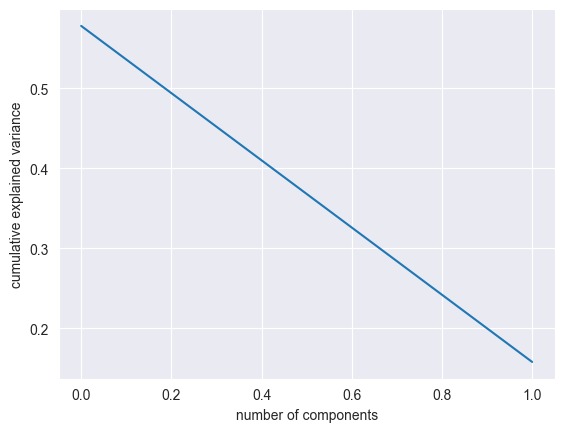

In [127]:
# Explained variance ratio
print("Explained variance ratio: ", pca.explained_variance_ratio_)

# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Explained variance ratio: PCA gives you the "components" in order of their explained variance, where the first component explains the most variance in the data. You can check the explained_variance_ratio_ attribute of the PCA object to see the amount of variance explained by each component. Often, you'll want to keep adding components until you've explained a sufficient amount of variance (e.g., 95%).

Scree plot: This is a plot of the variance explained by each component. It's often used in conjunction with the explained variance ratio. You may want to keep adding components until the additional explained variance starts to level off.


In [128]:
# the data is already scaled
X = data_scaled

# Fit PCA with more components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
print("Explained variance ratio: ", pca.explained_variance_ratio_)

# Fit KMeans with k-means++ initialization and optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10)
kmeans.fit(X_pca)

# Calculate Inertia and Silhouette Score
print("Inertia: ", kmeans.inertia_)
print("Silhouette Score: ", silhouette_score(X_pca, kmeans.labels_))

Explained variance ratio:  [0.57818803 0.15820049 0.12847184 0.08891643]
Inertia:  113.63781150350907
Silhouette Score:  0.31023696431758785


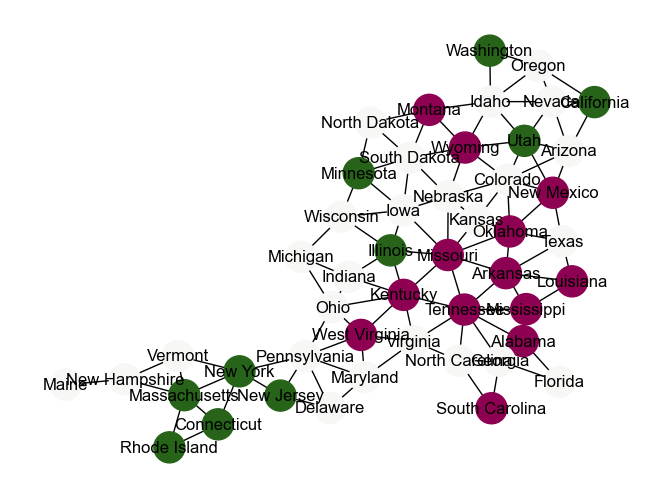

In [129]:
# Adjacency dictionary: each state is a key and the values are lists of states that it borders
neighbors = {
    'Alabama': ['Florida', 'Georgia', 'Tennessee', 'Mississippi'],
    'Arizona': ['California', 'Nevada', 'Utah', 'Colorado', 'New Mexico'],
    'Arkansas': ['Missouri', 'Tennessee', 'Mississippi', 'Louisiana', 'Texas', 'Oklahoma'],
    'California': ['Oregon', 'Nevada', 'Arizona'],
    'Colorado': ['Wyoming', 'Nebraska', 'Kansas', 'Oklahoma', 'New Mexico', 'Arizona', 'Utah'],
    'Connecticut': ['New York', 'Massachusetts', 'Rhode Island'],
    'Delaware': ['Maryland', 'Pennsylvania', 'New Jersey'],
    'Florida': ['Alabama', 'Georgia'],
    'Georgia': ['Florida', 'Alabama', 'Tennessee', 'North Carolina', 'South Carolina'],
    'Idaho': ['Washington', 'Oregon', 'Nevada', 'Utah', 'Wyoming', 'Montana'],
    'Illinois': ['Wisconsin', 'Iowa', 'Missouri', 'Kentucky', 'Indiana'],
    'Indiana': ['Michigan', 'Illinois', 'Kentucky', 'Ohio'],
    'Iowa': ['Minnesota', 'South Dakota', 'Nebraska', 'Missouri', 'Wisconsin', 'Illinois'],
    'Kansas': ['Nebraska', 'Colorado', 'Oklahoma', 'Missouri'],
    'Kentucky': ['Indiana', 'Illinois', 'Missouri', 'Tennessee', 'Virginia', 'West Virginia', 'Ohio'],
    'Louisiana': ['Texas', 'Arkansas', 'Mississippi'],
    'Maine': ['New Hampshire'],
    'Maryland': ['Virginia', 'West Virginia', 'Pennsylvania', 'Delaware'],
    'Massachusetts': ['Rhode Island', 'Connecticut', 'New York', 'New Hampshire', 'Vermont'],
    'Michigan': ['Indiana', 'Ohio', 'Wisconsin'],
    'Minnesota': ['North Dakota', 'South Dakota', 'Iowa', 'Wisconsin'],
    'Mississippi': ['Louisiana', 'Arkansas', 'Tennessee', 'Alabama'],
    'Missouri': ['Iowa', 'Illinois', 'Kentucky', 'Tennessee', 'Arkansas', 'Oklahoma', 'Kansas', 'Nebraska'],
    'Montana': ['Idaho', 'Wyoming', 'South Dakota', 'North Dakota'],
    'Nebraska': ['South Dakota', 'Iowa', 'Missouri', 'Kansas', 'Colorado', 'Wyoming'],
    'Nevada': ['Oregon', 'Idaho', 'Utah', 'Arizona', 'California'],
    'New Hampshire': ['Maine', 'Massachusetts', 'Vermont'],
    'New Jersey': ['Delaware', 'Pennsylvania', 'New York'],
    'New Mexico': ['Arizona', 'Colorado', 'Oklahoma', 'Texas'],
    'New York': ['New Jersey', 'Pennsylvania', 'Vermont', 'Massachusetts', 'Connecticut'],
    'North Carolina': ['Virginia', 'Tennessee', 'Georgia', 'South Carolina'],
    'North Dakota': ['Montana', 'South Dakota', 'Minnesota'],
    'Ohio': ['Pennsylvania', 'West Virginia', 'Kentucky', 'Indiana', 'Michigan'],
    'Oklahoma': ['Kansas', 'Missouri', 'Arkansas', 'Texas', 'New Mexico', 'Colorado'],
    'Oregon': ['Washington', 'Idaho', 'Nevada', 'California'],
    'Pennsylvania': ['New York', 'New Jersey', 'Delaware', 'Maryland', 'West Virginia', 'Ohio'],
    'Rhode Island': ['Connecticut', 'Massachusetts'],
    'South Carolina': ['Georgia', 'North Carolina'],
    'South Dakota': ['North Dakota', 'Minnesota', 'Iowa', 'Nebraska', 'Wyoming', 'Montana'],
    'Tennessee': ['Kentucky', 'Virginia', 'North Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Missouri'],
    'Texas': ['New Mexico', 'Oklahoma', 'Arkansas', 'Louisiana'],
    'Utah': ['Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Nevada'],
    'Vermont': ['New York', 'New Hampshire', 'Massachusetts'],
    'Virginia': ['West Virginia', 'Kentucky', 'Tennessee', 'North Carolina', 'Maryland'],
    'Washington': ['Oregon', 'Idaho'],
    'West Virginia': ['Ohio', 'Pennsylvania', 'Maryland', 'Virginia', 'Kentucky'],
    'Wisconsin': ['Minnesota', 'Iowa', 'Illinois', 'Michigan'],
    'Wyoming': ['Montana', 'South Dakota', 'Nebraska', 'Colorado', 'Utah', 'Idaho'],
}

# Initialize a new graph
G = nx.Graph()

# Add edges to the graph (each pair of neighboring states)
for state, neighbors in neighbors.items():
    for neighbor in neighbors:
        G.add_edge(state, neighbor)

# Add cluster information from the KMeans clustering as node attributes
for i, row in Full_DA_df_clustered.iterrows():
    if row['State'] in G:
        G.nodes[row['State']]['cluster'] = row['cluster']

# Get a layout for the graph
pos = nx.kamada_kawai_layout(G)

# Drawing the network, using different colors for different clusters
colors = [G.nodes[node]['cluster'] for node in G]
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.PiYG, node_size=500)
plt.show()



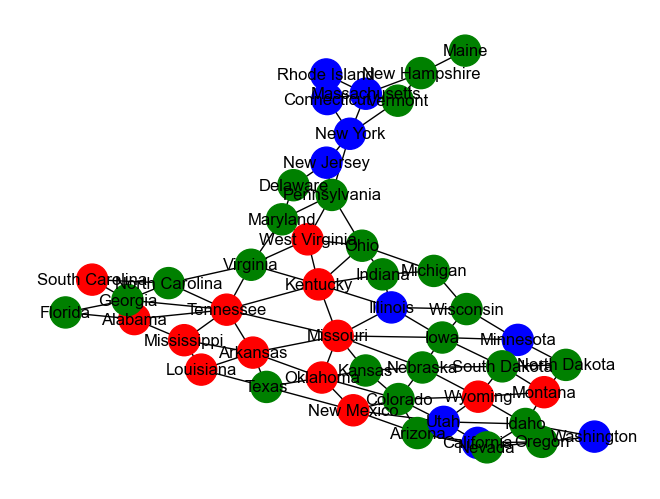

In [130]:
# Define a colormap with three distinct colors
cmap = mcolors.ListedColormap(['red', 'green', 'blue'])

# Get a layout for the graph
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

# Draw the network, using different colors for different clusters
colors = [G.nodes[node]['cluster'] for node in G]
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, node_size=500)
plt.show()


In [131]:
clusters = [(G.nodes[node]["cluster"]) for node in G]

states = list(G.nodes)

state_cluster = list(zip(states, clusters))
state_cluster

df_sc = pd.DataFrame(state_cluster, columns=["State", "Cluster"])
df_sc.head(5)

,State,Cluster
0,Alabama,0
1,Florida,1
2,Georgia,1
3,Tennessee,0
4,Mississippi,0


In [132]:
df_sc['State'] = df_sc['State'].map(state_abbr)
df_sc["Cluster"] = df_sc["Cluster"].astype(str)

fig = px.choropleth(df_sc,
                    locations='State',
                    locationmode='USA-states',
                    color='Cluster',
                    scope='usa',
                    labels={'Cluster': 'Cluster'},
                    title='Cluster by State')

# Show the plot
fig.show()


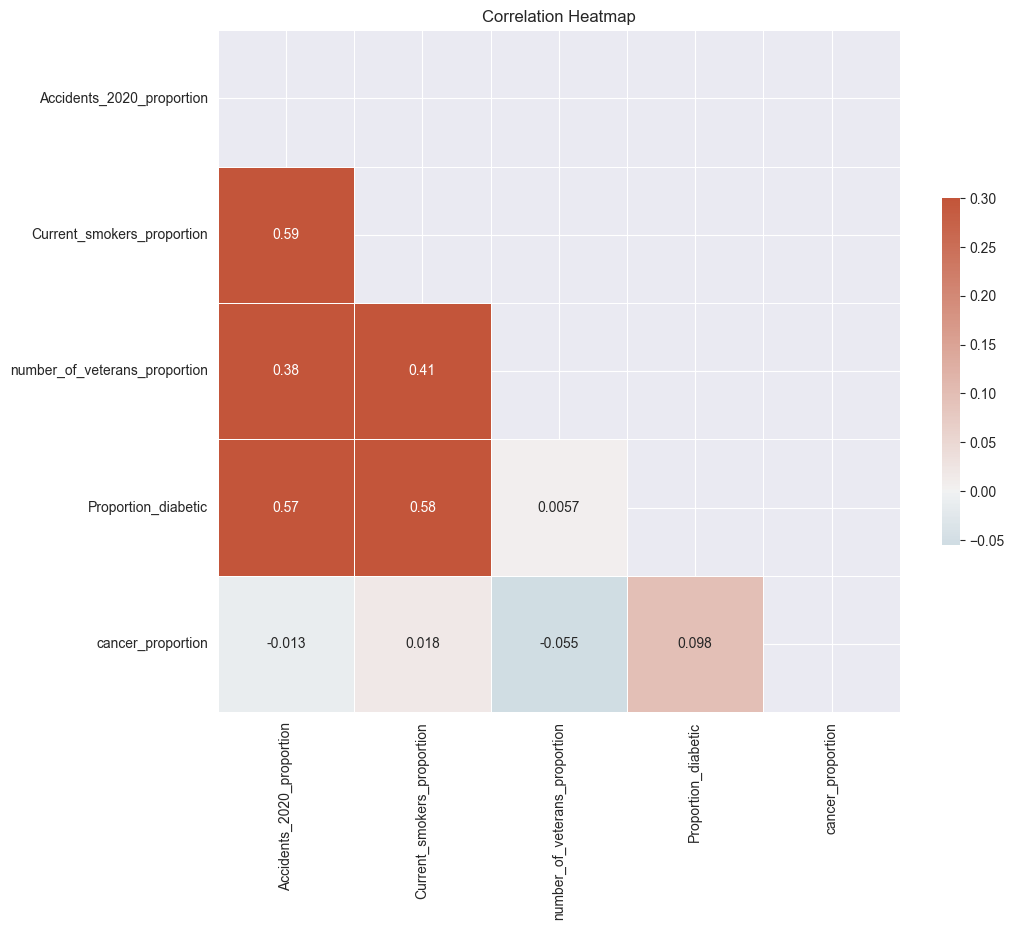

In [133]:
# Compute the correlation matrix from your dataframe (excluding 'State' and 'cluster' columns)
corr = Full_DA_df.drop(['State','Accidents_2018_proportion', 'Accidents_2019_proportion'], axis=1).corr()


# Generate a mask for the upper triangle (optional: this is just for aesthetics)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()


In [134]:
Full_DA_df_corr = Full_DA_df.drop(['Accidents_2018_proportion', 'Accidents_2019_proportion'], axis=1)

In [135]:
# Compute pairwise correlation of columns, dropping NA/null values
numeric_cols = Full_DA_df_corr.select_dtypes(include=[np.number])  # Ensures only numeric columns are used

correlations = {}
p_values = {}

for col1 in numeric_cols.columns:
    for col2 in numeric_cols.columns:
        if col1 != col2:
            corr, pval = pearsonr(numeric_cols[col1], numeric_cols[col2])
            correlations[col1 + ' and ' + col2] = corr
            p_values[col1 + ' and ' + col2] = pval

# Convert the results to dataframes for easier reading
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Pair', 'Correlation'])
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Pair', 'p-value'])

# Merge the two dataframes on Pair
correlation_analysis = pd.merge(correlations_df, p_values_df, on="Pair")

# Filter the results to show only statistically significant correlations (p < 0.05)
significant_correlations = correlation_analysis[correlation_analysis['p-value'] < 0.05]

# Sort the dataframe by absolute value of correlation, from high to low
significant_correlations['abs_correlation'] = significant_correlations['Correlation'].abs()
significant_correlations_sorted = significant_correlations.sort_values('abs_correlation', ascending=False).drop('abs_correlation', axis=1)

print(significant_correlations_sorted)

                                                 Pair  Correlation   p-value
0   Accidents_2020_proportion and Current_smokers_...     0.594462  0.000005
4   Current_smokers_proportion and Accidents_2020_...     0.594462  0.000005
6   Current_smokers_proportion and Proportion_diab...     0.584368  0.000008
13  Proportion_diabetic and Current_smokers_propor...     0.584368  0.000008
2   Accidents_2020_proportion and Proportion_diabetic     0.566135  0.000018
12  Proportion_diabetic and Accidents_2020_proportion     0.566135  0.000018
5   Current_smokers_proportion and number_of_veter...     0.413105  0.002867
9   number_of_veterans_proportion and Current_smok...     0.413105  0.002867
1   Accidents_2020_proportion and number_of_vetera...     0.380845  0.006362
8   number_of_veterans_proportion and Accidents_20...     0.380845  0.006362


/var/folders/wk/mh3nlc5d5mz44xkrmh91ptl00000gn/T/ipykernel_20226/4129284909.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

